# g-factor XY Correction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data
strain_yymxx = pd.read_csv("/content/drive/MyDrive/Jiang Lab/Rooney Paper Sim/Au Result 1/strain_yy-xx data.csv")

# Extract unique x and y coordinates
x_unique = np.sort(strain_yymxx['x'].unique())
y_unique = np.sort(strain_yymxx['y'].unique())

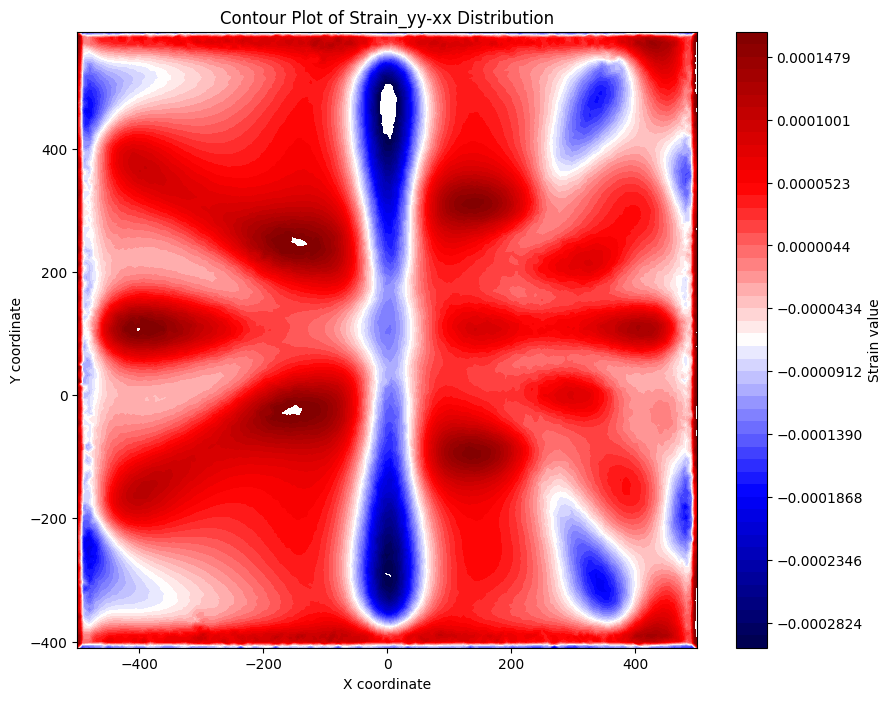

In [4]:
# Create a grid for x and y coordinates
X, Y = np.meshgrid(x_unique, y_unique)

# Map strain values onto the grid
# Ensure the data is sorted by 'y' then 'x' to match the meshgrid orientation
data_sorted = strain_yymxx.sort_values(by=['y', 'x'])
Z = data_sorted['strain_value'].values.reshape(X.shape)

# Plotting the g_xx correction
# Calculate percentiles to focus on the core distribution
percent_yymxx = [0.2, 99.8]
start_value = np.percentile(Z, percent_yymxx[0])  # 10th percentile
end_value = np.percentile(Z, percent_yymxx [1])    # 90th percentile

# Define the range and number of contours
levels = np.linspace(start_value, end_value, 50)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=levels, cmap='seismic')
plt.colorbar(contour, label='Strain value')
plt.title('Contour Plot of Strain_yy-xx Distribution')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

In [5]:
# Input constants used in g_xx correction
# For Ge, we have the following:
b = -2.160
k = 3.410
delta_LH = 71 * 10**(-3) # eV

# Define the function to calculate the g_xx correction
def g_xx_func(eps_yymxx):
    g_xx = (6 * b * k * eps_yymxx)/delta_LH
    return g_xx

In [6]:
# Create a new DataFrame for g_xx values and coordinates
g_xx_data = pd.DataFrame({
    'x': strain_yymxx['x'],
    'y': strain_yymxx['y'],
    'g_xx': g_xx_func(strain_yymxx['strain_value'])
})


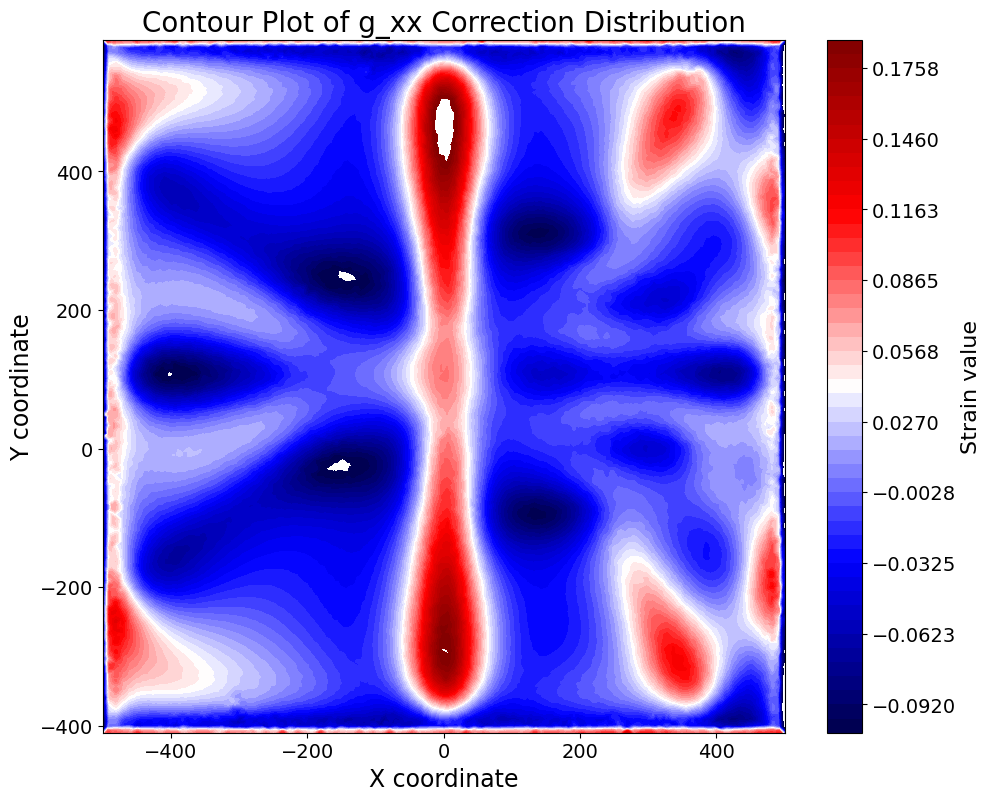

In [7]:
# Ensure data is sorted properly by 'y' then 'x' to match the meshgrid ordering
g_xx_data_sorted = g_xx_data.sort_values(by=['y', 'x'])
Z = g_xx_data_sorted['g_xx'].values.reshape(X.shape)

# Plotting the g_xx correction
# Calculate percentiles to focus on the core distribution
start_value = np.percentile(Z, percent_yymxx[0])  # 10th percentile
end_value = np.percentile(Z, percent_yymxx[1])    # 90th percentile

# Define the range and number of contours
levels = np.linspace(start_value, end_value, 50)

plt.figure(figsize=(11, 9))
contour = plt.contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = plt.colorbar(contour)
cbar.set_label('Strain value', fontsize=16)  # Set the color bar label with larger font size
cbar.ax.tick_params(labelsize=14)  # Set the color bar tick labels with larger font size

# Set the title and axis labels with larger font size
plt.title('Contour Plot of g_xx Correction Distribution', fontsize=20)
plt.xlabel('X coordinate', fontsize=17)
plt.ylabel('Y coordinate', fontsize=17)

# Set the tick parameters with larger font size
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# g-factor ZX Correction

In [8]:
# Load the data
strain_xz = pd.read_csv("/content/drive/MyDrive/Jiang Lab/Rooney Paper Sim/Au Result 1/strain_xz data.csv")

# Extract unique x and y coordinates
x_unique = np.sort(strain_xz['x'].unique())
y_unique = np.sort(strain_xz['y'].unique())

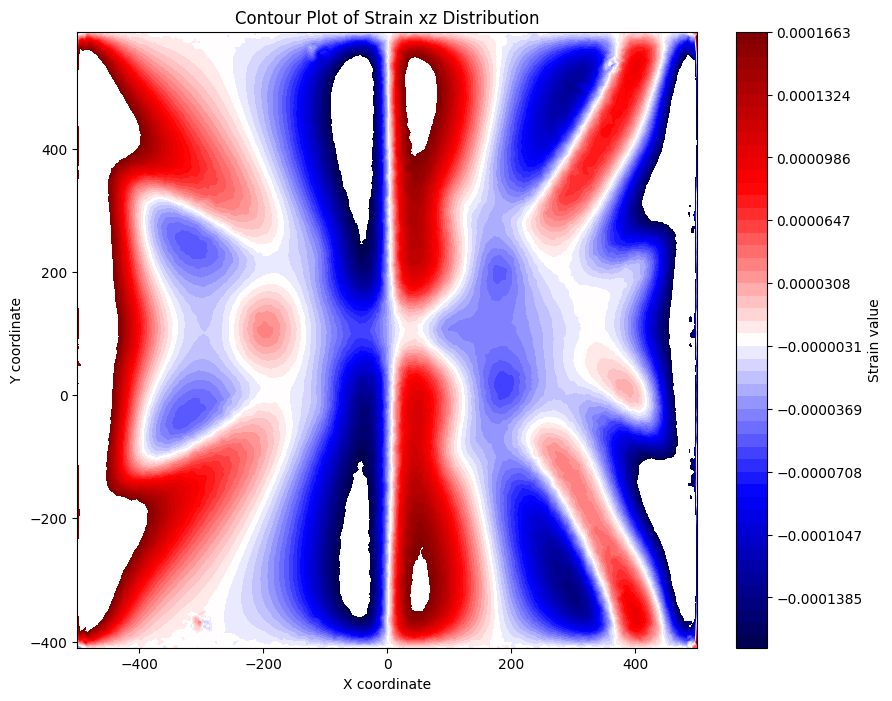

In [9]:
# Create a grid for x and y coordinates
X, Y = np.meshgrid(x_unique, y_unique)

# Map strain values onto the grid
# Ensure the data is sorted by 'y' then 'x' to match the meshgrid orientation
data_sorted = strain_xz.sort_values(by=['y', 'x'])
Z = data_sorted['strain_value'].values.reshape(X.shape)

# Calculate percentiles to focus on the core distribution
percent_xz = [7,93]
start_value = np.percentile(Z, percent_xz[0])  # 10th percentile
end_value = np.percentile(Z, percent_xz[1])    # 90th percentile

levels = np.linspace(start_value, end_value, 50)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=levels, cmap='seismic')
plt.colorbar(contour, label='Strain value')
plt.title('Contour Plot of Strain xz Distribution')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()


In [10]:
# Input constants used in g_zx correction
# For Ge, we have the following:
d = -6.060
k = 3.410
delta_LH = 71 * 10**(-3) # 71eV

# Define the function to calculate the g_xx correction
def g_zx_func(eps_xz):
    g_zx = (-4*np.sqrt(3) * d * k * eps_xz)/delta_LH
    return g_zx

In [11]:
# Create a new DataFrame for g_zx values and coordinates
g_zx_data = pd.DataFrame({
    'x': strain_xz['x'],
    'y': strain_xz['y'],
    'g_zx': g_zx_func(strain_xz['strain_value'])
})

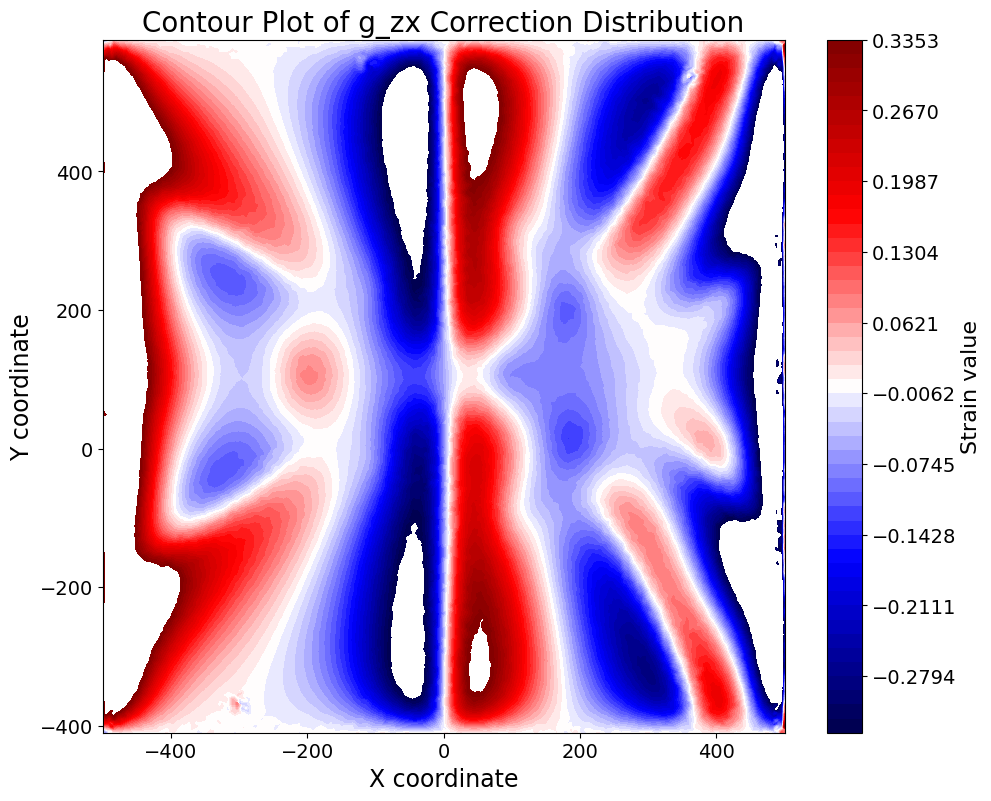

In [12]:
# Ensure data is sorted properly by 'y' then 'x' to match the meshgrid ordering
g_zx_data_sorted = g_zx_data.sort_values(by=['y', 'x'])
Z = g_zx_data_sorted['g_zx'].values.reshape(X.shape)

# Plotting the g_xx correction
# Calculate percentiles to focus on the core distribution
start_value = np.percentile(Z, percent_xz[0])  # 10th percentile
end_value = np.percentile(Z, percent_xz[1])    # 90th percentile

levels = np.linspace(start_value, end_value, 50)

plt.figure(figsize=(11, 9))
contour = plt.contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = plt.colorbar(contour)
cbar.set_label('Strain value', fontsize=16)  # Set the color bar label with larger font size
cbar.ax.tick_params(labelsize=14)  # Set the color bar tick labels with larger font size

# Set the title and axis labels with larger font size
plt.title('Contour Plot of g_zx Correction Distribution', fontsize=20)
plt.xlabel('X coordinate', fontsize=17)
plt.ylabel('Y coordinate', fontsize=17)

# Set the tick parameters with larger font size
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# g-factor ZY Correction

In [13]:
# Load the data
strain_yz = pd.read_csv("/content/drive/MyDrive/Jiang Lab/Rooney Paper Sim/Au Result 1/strain_yz data.csv")

# Extract unique x and y coordinates
x_unique = np.sort(strain_yz['x'].unique())
y_unique = np.sort(strain_yz['y'].unique())

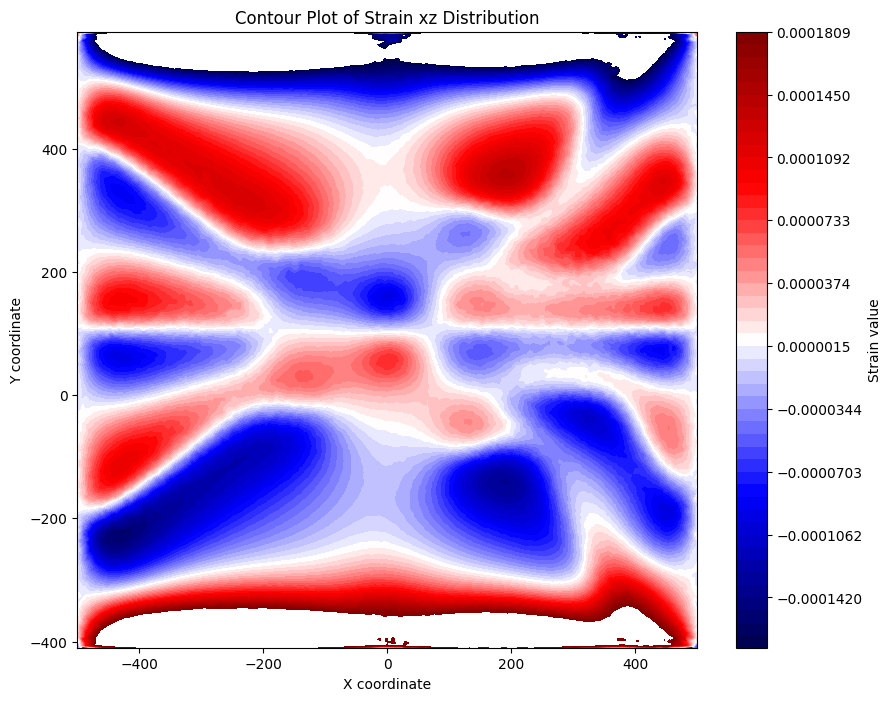

In [21]:
# Create a grid for x and y coordinates
X, Y = np.meshgrid(x_unique, y_unique)

# Map strain values onto the grid
# Ensure the data is sorted by 'y' then 'x' to match the meshgrid orientation
data_sorted = strain_yz.sort_values(by=['y', 'x'])
Z = data_sorted['strain_value'].values.reshape(X.shape)

# Calculate percentiles to focus on the core distribution
percent_yz = [5, 95]
start_value = np.percentile(Z, percent_yz[0])  # 10th percentile
end_value = np.percentile(Z, percent_yz[1])    # 90th percentile

levels = np.linspace(start_value, end_value, 50)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=levels, cmap='seismic')
plt.colorbar(contour, label='Strain value')
plt.title('Contour Plot of Strain xz Distribution')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

In [22]:
# Input constants used in g_zy correction
# For Ge, we have the following:
d = -6.060
k = 3.410
delta_LH = 71 * 10**(-3) # meV

# Define the function to calculate the g_xx correction
def g_zy_func(eps_yz):
    g_zy = (-4*np.sqrt(3) * d * k * eps_yz)/delta_LH
    return g_zy

In [23]:
# Create a new DataFrame for g_zy values and coordinates
g_zy_data = pd.DataFrame({
    'x': strain_yz['x'],
    'y': strain_yz['y'],
    'g_zy': g_zy_func(strain_yz['strain_value'])
})

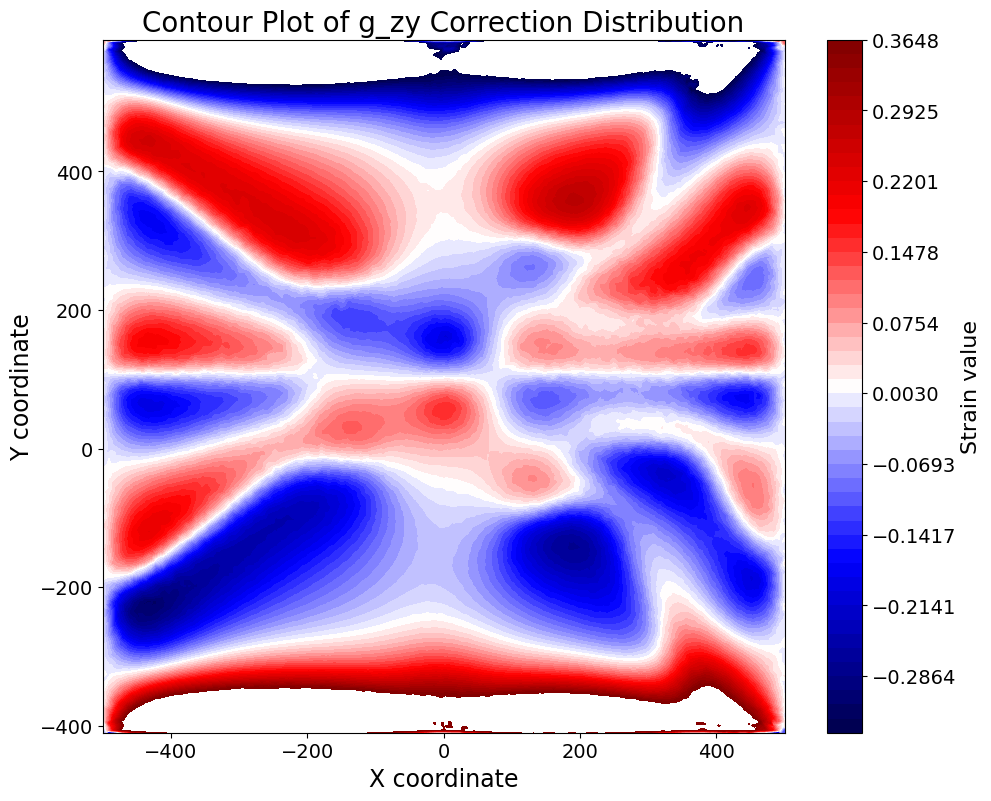

In [24]:
# Ensure data is sorted properly by 'y' then 'x' to match the meshgrid ordering
g_zy_data_sorted = g_zy_data.sort_values(by=['y', 'x'])
Z = g_zy_data_sorted['g_zy'].values.reshape(X.shape)

# Plotting the g_xx correction
# Calculate percentiles to focus on the core distribution
start_value = np.percentile(Z, percent_yz[0])  # 10th percentile
end_value = np.percentile(Z, percent_yz[1])    # 90th percentile

levels = np.linspace(start_value, end_value, 50)

plt.figure(figsize=(11, 9))
contour = plt.contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = plt.colorbar(contour)
cbar.set_label('Strain value', fontsize=16)  # Set the color bar label with larger font size
cbar.ax.tick_params(labelsize=14)  # Set the color bar tick labels with larger font size

# Set the title and axis labels with larger font size
plt.title('Contour Plot of g_zy Correction Distribution', fontsize=20)
plt.xlabel('X coordinate', fontsize=17)
plt.ylabel('Y coordinate', fontsize=17)

# Set the tick parameters with larger font size
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


# g-factor XY Correction

In [25]:
# Load the data
strain_xy = pd.read_csv("/content/drive/MyDrive/Jiang Lab/Rooney Paper Sim/Au Result 1/strain_xy data.csv")

# Extract unique x and y coordinates
x_unique = np.sort(strain_xy['x'].unique())
y_unique = np.sort(strain_xy['y'].unique())

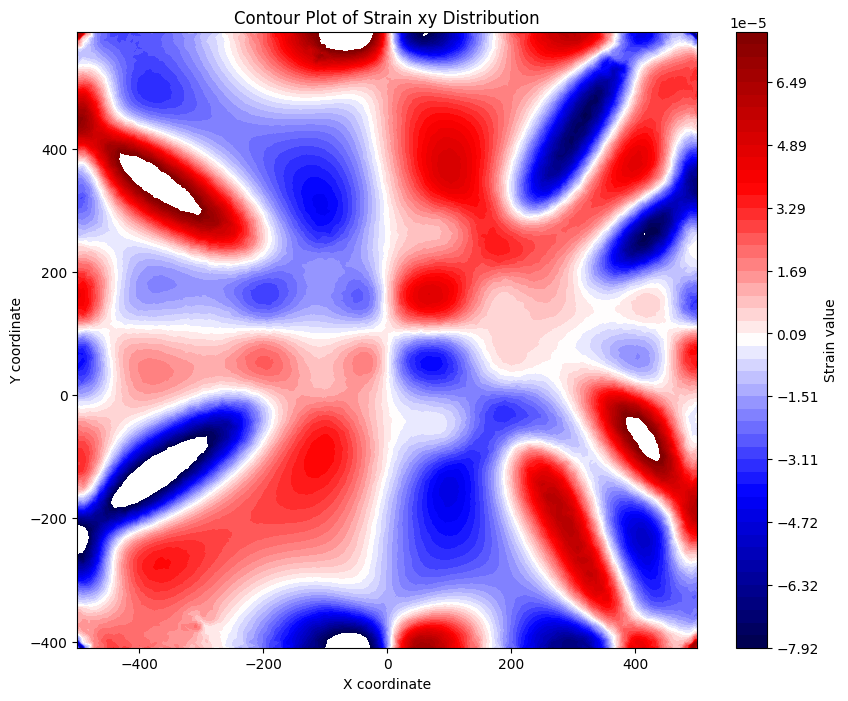

In [26]:
# Create a grid for x and y coordinates
X, Y = np.meshgrid(x_unique, y_unique)

# Map strain values onto the grid
# Ensure the data is sorted by 'y' then 'x' to match the meshgrid orientation
data_sorted = strain_xy.sort_values(by=['y', 'x'])
Z = data_sorted['strain_value'].values.reshape(X.shape)

# Calculate percentiles to focus on the core distribution
percent_xy = [1, 99]
start_value = np.percentile(Z, percent_xy[0])  # 10th percentile
end_value = np.percentile(Z, percent_xy[1])    # 90th percentile

levels = np.linspace(start_value, end_value, 50)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=levels, cmap='seismic')
plt.colorbar(contour, label='Strain value')
plt.title('Contour Plot of Strain xy Distribution')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

In [27]:
# Input constants used in g_xy correction
# For Ge, we have the following:
d = -6.060
k = 3.410
delta_LH = 71 * 10**(-3) # meV

# Define the function to calculate the g_xy correction
def g_xy_func(eps_xy):
    g_xy = (-4*np.sqrt(3) * d * k * eps_xy)/delta_LH
    return g_xy

In [28]:
# Create a new DataFrame for g_zy values and coordinates
g_xy_data = pd.DataFrame({
    'x': strain_yz['x'],
    'y': strain_yz['y'],
    'g_xy': g_xy_func(strain_xy['strain_value'])
})

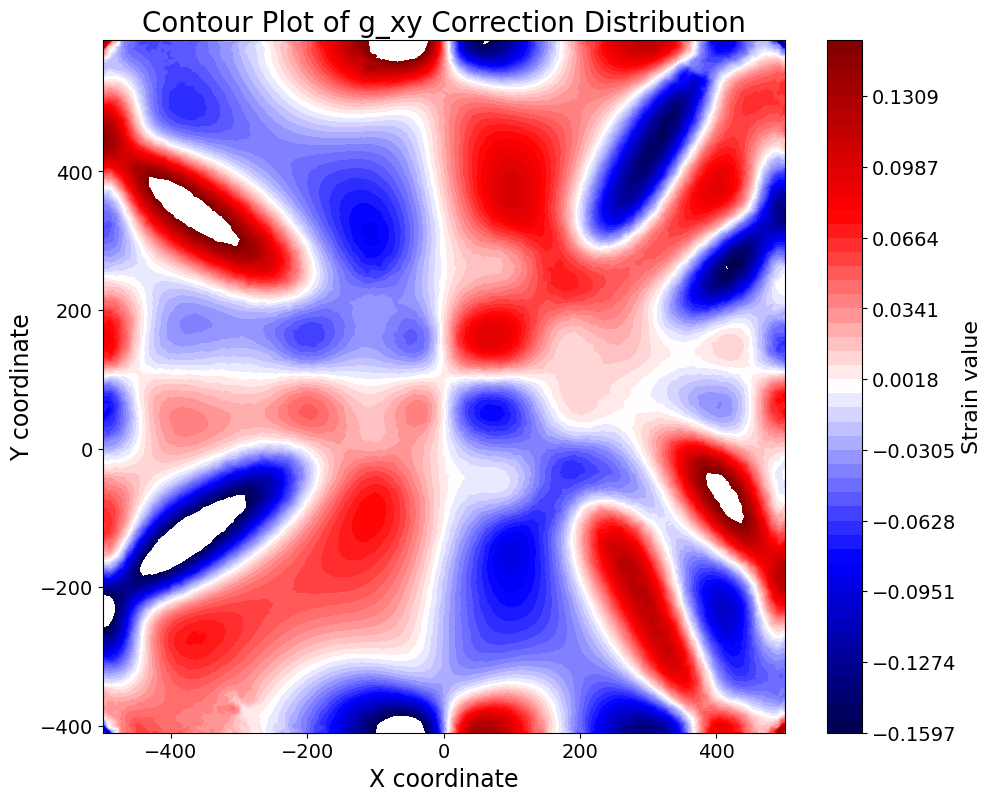

In [29]:
# Ensure data is sorted properly by 'y' then 'x' to match the meshgrid ordering
g_xy_data_sorted = g_xy_data.sort_values(by=['y', 'x'])
Z = g_xy_data_sorted['g_xy'].values.reshape(X.shape)

# Plotting the g_xx correction
# Calculate percentiles to focus on the core distribution
start_value = np.percentile(Z, percent_xy[0])  # 10th percentile
end_value = np.percentile(Z, percent_xy[1])    # 90th percentile

levels = np.linspace(start_value, end_value, 50)

plt.figure(figsize=(11, 9))
contour = plt.contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = plt.colorbar(contour)
cbar.set_label('Strain value', fontsize=16)  # Set the color bar label with larger font size
cbar.ax.tick_params(labelsize=14)  # Set the color bar tick labels with larger font size

# Set the title and axis labels with larger font size
plt.title('Contour Plot of g_xy Correction Distribution', fontsize=20)
plt.xlabel('X coordinate', fontsize=17)
plt.ylabel('Y coordinate', fontsize=17)

# Set the tick parameters with larger font size
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Combined Plots

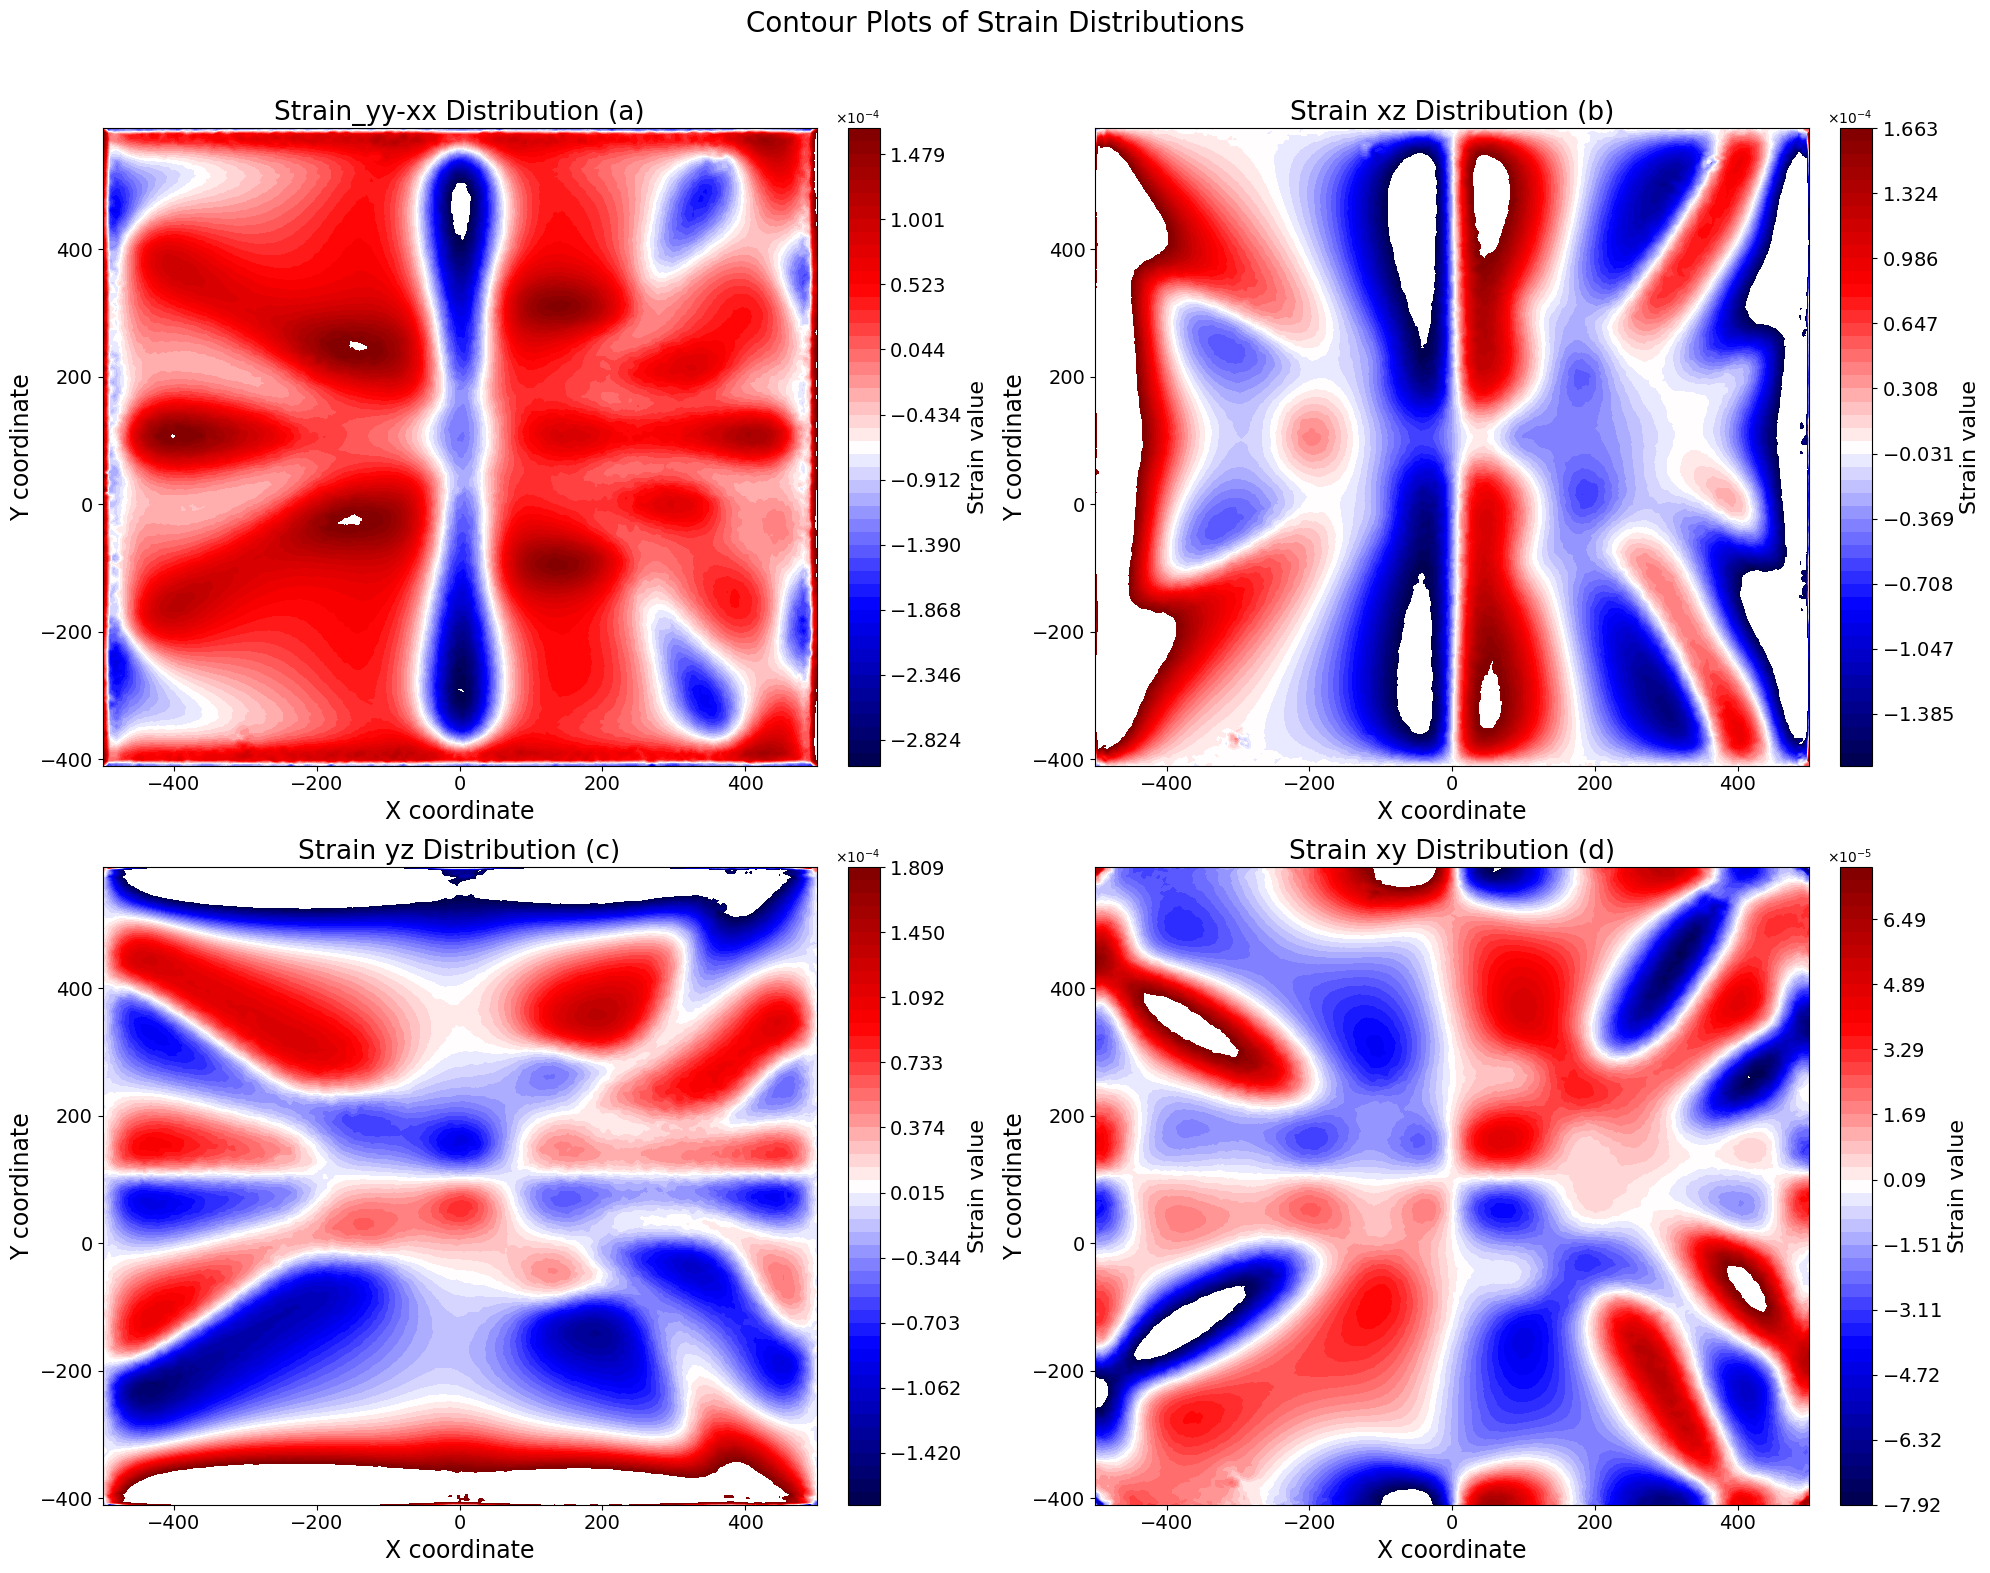

In [30]:
# Create a grid for x and y coordinates
X, Y = np.meshgrid(x_unique, y_unique)

fig, axs = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Contour Plots of Strain Distributions', fontsize=20)

# Function to format color bar ticks in scientific notation
def format_colorbar(cbar):
    cbar.set_label('Strain value', fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-2, 2))
    cbar.ax.yaxis.set_major_formatter(formatter)

# List of subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)']

# Plot 1: Strain_yy-xx Distribution
data_sorted = strain_yymxx.sort_values(by=['y', 'x'])
Z = data_sorted['strain_value'].values.reshape(X.shape)
start_value = np.percentile(Z, percent_yymxx[0])
end_value = np.percentile(Z, percent_yymxx[1])
levels = np.linspace(start_value, end_value, 50)
contour = axs[0, 0].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[0, 0], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[0, 0].set_title(f'Strain_yy-xx Distribution {subplot_labels[0]}', fontsize=19)
axs[0, 0].set_xlabel('X coordinate', fontsize=17)
axs[0, 0].set_ylabel('Y coordinate', fontsize=17)
axs[0, 0].tick_params(axis='both', which='major', labelsize=14)

# Plot 2: Strain xz Distribution
data_sorted = strain_xz.sort_values(by=['y', 'x'])
Z = data_sorted['strain_value'].values.reshape(X.shape)
start_value = np.percentile(Z, percent_xz[0])
end_value = np.percentile(Z, percent_xz[1])
levels = np.linspace(start_value, end_value, 50)
contour = axs[0, 1].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[0, 1], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[0, 1].set_title(f'Strain xz Distribution {subplot_labels[1]}', fontsize=19)
axs[0, 1].set_xlabel('X coordinate', fontsize=17)
axs[0, 1].set_ylabel('Y coordinate', fontsize=17)
axs[0, 1].tick_params(axis='both', which='major', labelsize=14)

# Plot 3: Strain yz Distribution
data_sorted = strain_yz.sort_values(by=['y', 'x'])
Z = data_sorted['strain_value'].values.reshape(X.shape)
start_value = np.percentile(Z, percent_yz[0])
end_value = np.percentile(Z, percent_yz[1])
levels = np.linspace(start_value, end_value, 50)
contour = axs[1, 0].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[1, 0], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[1, 0].set_title(f'Strain yz Distribution {subplot_labels[2]}', fontsize=19)
axs[1, 0].set_xlabel('X coordinate', fontsize=17)
axs[1, 0].set_ylabel('Y coordinate', fontsize=17)
axs[1, 0].tick_params(axis='both', which='major', labelsize=14)

# Plot 4: Strain xy Distribution
data_sorted = strain_xy.sort_values(by=['y', 'x'])
Z = data_sorted['strain_value'].values.reshape(X.shape)
start_value = np.percentile(Z, percent_xy[0])
end_value = np.percentile(Z, percent_xy[1])
levels = np.linspace(start_value, end_value, 50)
contour = axs[1, 1].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[1, 1], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[1, 1].set_title(f'Strain xy Distribution {subplot_labels[3]}', fontsize=19)
axs[1, 1].set_xlabel('X coordinate', fontsize=17)
axs[1, 1].set_ylabel('Y coordinate', fontsize=17)
axs[1, 1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

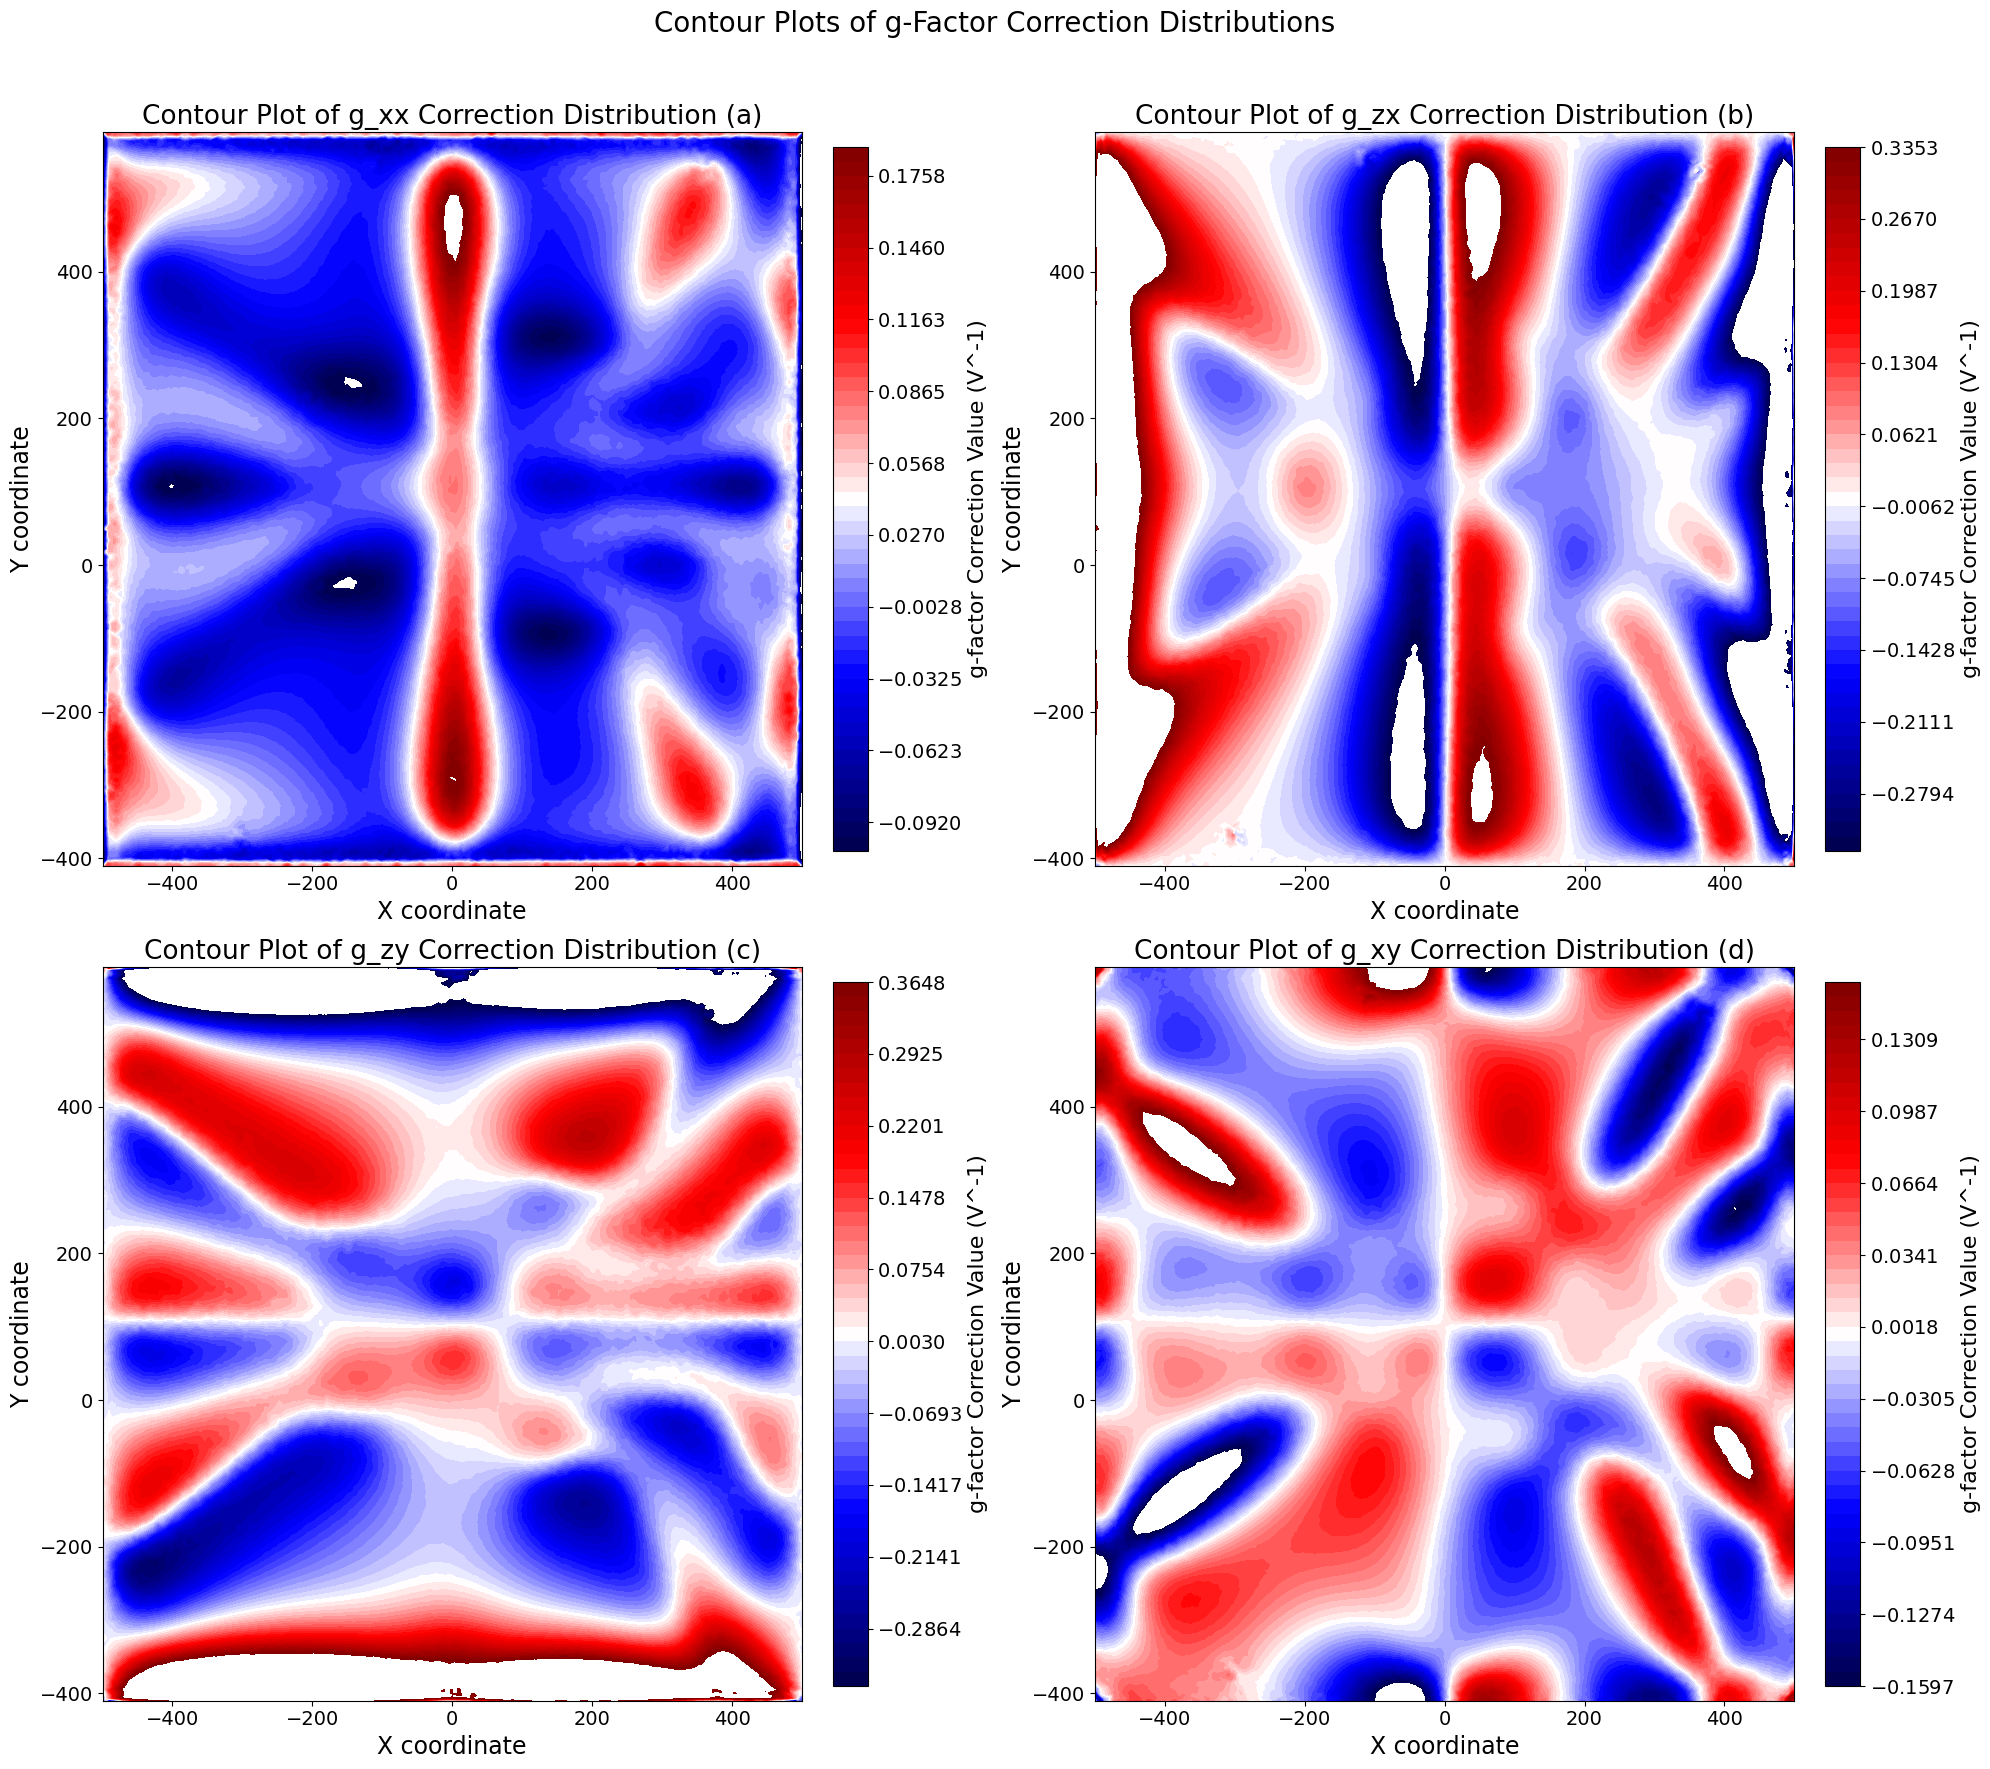

In [31]:

# Define a function to format the colorbar
def format_colorbar(cbar):
    cbar.set_label('g-factor Correction Value (V^-1)', fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    formatter = ScalarFormatter(useMathText=True)
    #formatter.set_scientific(True)
    #formatter.set_powerlimits((-2, 2))
    cbar.ax.yaxis.set_major_formatter(formatter)

# Create a grid for x and y coordinates
X, Y = np.meshgrid(x_unique, y_unique)

fig, axs = plt.subplots(2, 2, figsize=(20, 18))
fig.suptitle('Contour Plots of g-Factor Correction Distributions', fontsize=20)

# Plot 1: g_xx Correction Distribution
g_xx_data_sorted = g_xx_data.sort_values(by=['y', 'x'])
Z = g_xx_data_sorted['g_xx'].values.reshape(X.shape)
start_value = np.percentile(Z, percent_yymxx[0])
end_value = np.percentile(Z, percent_yymxx[1])
levels = np.linspace(start_value, end_value, 50)
contour = axs[0, 0].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[0, 0], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[0, 0].set_title('Contour Plot of g_xx Correction Distribution (a)', fontsize=19)
axs[0, 0].set_xlabel('X coordinate', fontsize=17)
axs[0, 0].set_ylabel('Y coordinate', fontsize=17)
axs[0, 0].tick_params(axis='both', which='major', labelsize=14)

# Plot 2: g_zx Correction Distribution
g_zx_data_sorted = g_zx_data.sort_values(by=['y', 'x'])
Z = g_zx_data_sorted['g_zx'].values.reshape(X.shape)
start_value = np.percentile(Z, percent_xz[0])
end_value = np.percentile(Z, percent_xz[1])
levels = np.linspace(start_value, end_value, 50)
contour = axs[0, 1].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[0, 1], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[0, 1].set_title('Contour Plot of g_zx Correction Distribution (b)', fontsize=19)
axs[0, 1].set_xlabel('X coordinate', fontsize=17)
axs[0, 1].set_ylabel('Y coordinate', fontsize=17)
axs[0, 1].tick_params(axis='both', which='major', labelsize=14)

# Plot 3: g_zy Correction Distribution
g_zy_data_sorted = g_zy_data.sort_values(by=['y', 'x'])
Z = g_zy_data_sorted['g_zy'].values.reshape(X.shape)
start_value = np.percentile(Z, percent_yz[0])
end_value = np.percentile(Z, percent_yz[1])
levels = np.linspace(start_value, end_value, 50)
contour = axs[1, 0].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[1, 0], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[1, 0].set_title('Contour Plot of g_zy Correction Distribution (c)', fontsize=19)
axs[1, 0].set_xlabel('X coordinate', fontsize=17)
axs[1, 0].set_ylabel('Y coordinate', fontsize=17)
axs[1, 0].tick_params(axis='both', which='major', labelsize=14)

# Plot 4: g_xy Correction Distribution
g_xy_data_sorted = g_xy_data.sort_values(by=['y', 'x'])
Z = g_xy_data_sorted['g_xy'].values.reshape(X.shape)
start_value = np.percentile(Z, percent_xy[0])
end_value = np.percentile(Z, percent_xy[1])
levels = np.linspace(start_value, end_value, 50)
contour = axs[1, 1].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[1, 1], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[1, 1].set_title('Contour Plot of g_xy Correction Distribution (d)', fontsize=19)
axs[1, 1].set_xlabel('X coordinate', fontsize=17)
axs[1, 1].set_ylabel('Y coordinate', fontsize=17)
axs[1, 1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()